<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/main/ARIMA_wind_Speed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Import Dataset**

In [133]:
df=pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv')
df=df[['Date & Time','Wind Speed m/s']]
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%d/%m/%Y %H:%M:%S")
df["Wind Speed m/s"] = pd.to_numeric(df["Wind Speed m/s"], downcast="float")
df.set_index('Date & Time',inplace=True)
df=df.head(1000)
df.tail()

,Wind Speed m/s
Date & Time,
2021-06-02 02:45:50,7.9
2021-06-02 02:46:00,8.3
2021-06-02 02:46:10,8.3
2021-06-02 02:46:20,8.5
2021-06-02 02:46:30,8.3


In [134]:
type(df)

pandas.core.frame.DataFrame

# **Convert to series**

In [135]:
df_series=df.values
type(df_series)

numpy.ndarray

In [136]:
df.size

1000

In [137]:
df.describe()

,Wind Speed m/s
count,1000.000000
mean,8.932704
std,0.685353
min,6.700000
25%,8.500000
50%,8.900000
75%,9.400000
max,11.300000


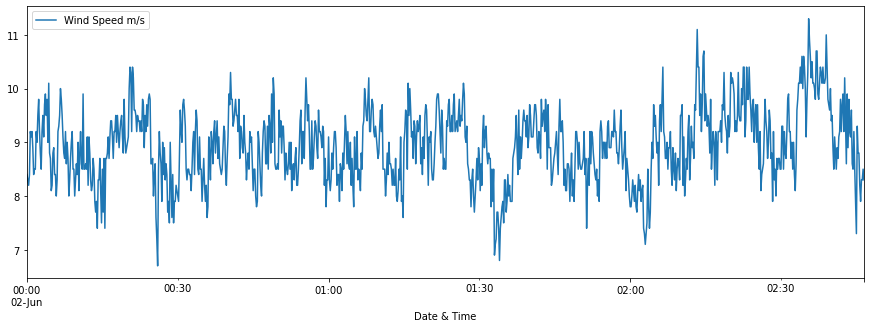

In [138]:
df.plot(figsize=(15,5))

# ***Smoothing***

In [139]:
df_mean=df.rolling(window = 10).mean()#taking moving average
df_mean

,Wind Speed m/s
Date & Time,
2021-06-02 00:00:00,NaN
2021-06-02 00:00:10,NaN
2021-06-02 00:00:20,NaN
2021-06-02 00:00:30,NaN
2021-06-02 00:00:40,NaN
...,...
2021-06-02 02:45:50,8.44
2021-06-02 02:46:00,8.42
2021-06-02 02:46:10,8.33


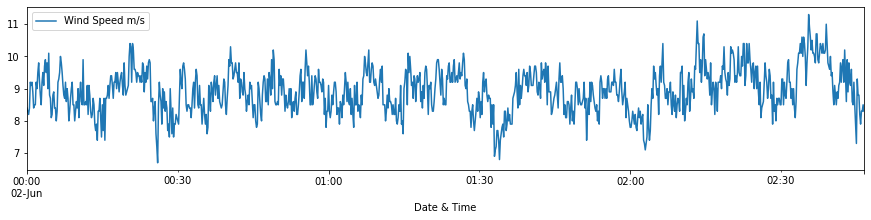

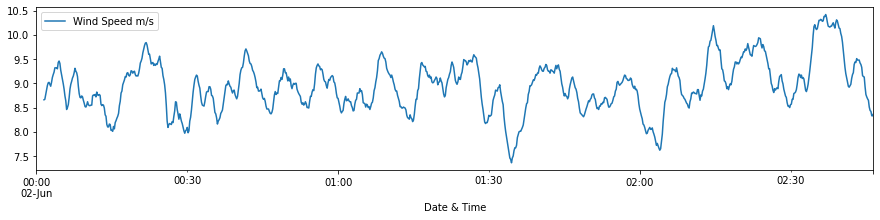

In [100]:
df.plot(figsize=(15,3))
df_mean.plot(figsize=(15,3))

In [143]:
df_mean=df_mean[10:]
df_mean.size

970

# **Base line model**

In [101]:
value=pd.DataFrame(df_series)# same as df

In [102]:
df_new=pd.concat([df,df.shift(1)],axis=1)
df_new.head()

,Wind Speed m/s,Wind Speed m/s
Date & Time,,
2021-06-02 00:00:00,8.4,NaN
2021-06-02 00:00:10,8.3,8.4
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4


In [103]:
df_new.columns = ['Actual','Forecast']
df_new=df_new.head(100)

In [104]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [105]:
df_new=df_new[1:]
df_new.head()

,Actual,Forecast
Date & Time,,
2021-06-02 00:00:10,8.3,8.4
2021-06-02 00:00:20,8.2,8.3
2021-06-02 00:00:30,8.4,8.2
2021-06-02 00:00:40,9.2,8.4
2021-06-02 00:00:50,9.1,9.2


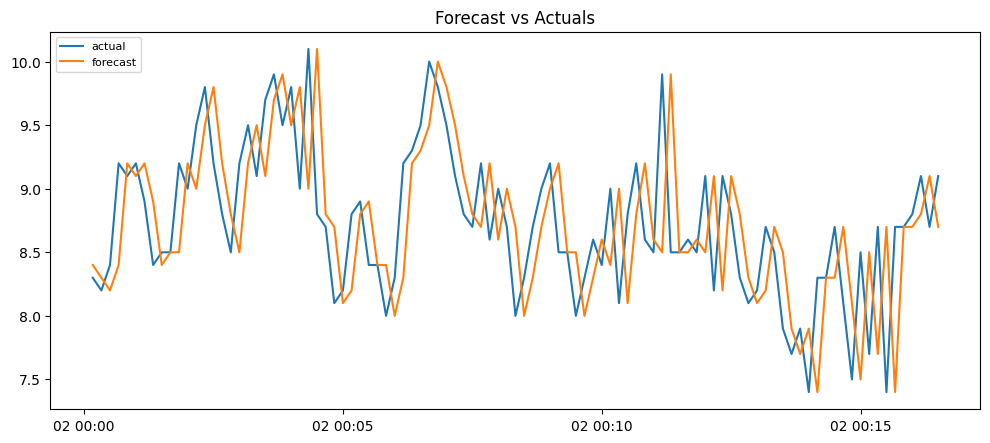

In [106]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(df_new['Actual'], label='training')
plt.plot(df_new['Actual'], label='actual')
plt.plot(df_new['Forecast'], label='forecast',)
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [107]:
error=mean_squared_error(df_new.Actual,df_new.Forecast)
error

0.3083838

In [108]:
np.sqrt(error)

0.5553231

# **Identify the best Order for ARIMA**

In [109]:
pip install pmdarima

In [110]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [191]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Wind Speed m/s'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1347.184, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1564.521, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1435.952, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1381.302, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1562.521, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1357.680, Time=1.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1364.576, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1345.378, Time=1.92 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1365.223, Time=0.59 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1360.623, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1370.690, Time=0.39 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1359.4

# ***ARIMA*** **(p,d,q)**
Autoregressive (p) Integrated(d) Moving Average(q)


*   ***pacf*** for identify p
*   ***acf*** for identify q



In [70]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [190]:
adf_test(df['Wind Speed m/s'])

1. ADF :  -6.620434550260171
2. P-Value :  6.056287296079357e-09
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 995
5. Critical Values :
	 1% :  -3.4369391965679257
	 5% :  -2.86444914142694
	 10% :  -2.5683189679553546


In [145]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

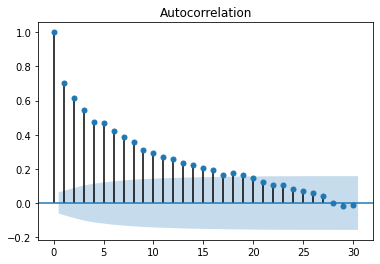

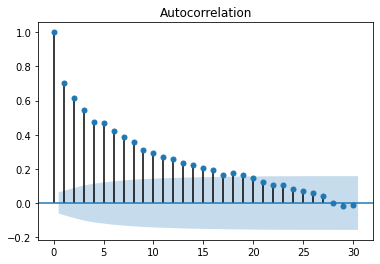

In [189]:
plot_acf(df)# to q=17

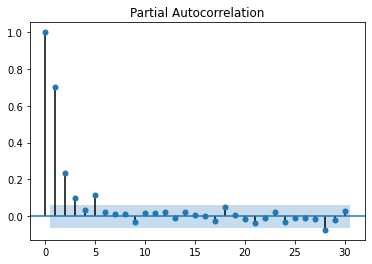

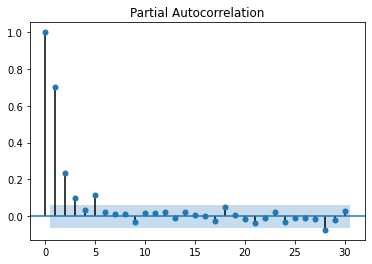

In [188]:
plot_pacf(df)#to p=3_

In [193]:
#p=2  d=0 q=5,6

df_train=df[0:850]
df_test=df[850:]


In [181]:
from statsmodels.tsa.arima_model import ARIMA
df_model=ARIMA(df_train,order=(2,1,2))
df_model_fit=df_model.fit()
df_model_fit.aic

1118.9750404852732

In [192]:
df_forecast= df_model_fit.forecast(steps=150)[0]


In [184]:
df_forecast=pd.DataFrame(df_forecast,index=df_test.index)
df_forecast.columns=['Wind Speed m/s']
df_forecast.tail()

,Wind Speed m/s
Date & Time,
2021-06-02 02:45:50,8.967642
2021-06-02 02:46:00,8.967836
2021-06-02 02:46:10,8.968029
2021-06-02 02:46:20,8.968222
2021-06-02 02:46:30,8.968416


In [185]:
df_test.tail()

,Wind Speed m/s
Date & Time,
2021-06-02 02:45:50,7.9
2021-06-02 02:46:00,8.3
2021-06-02 02:46:10,8.3
2021-06-02 02:46:20,8.5
2021-06-02 02:46:30,8.3


In [186]:
np.sqrt(mean_squared_error(df_test,df_forecast))

0.8368187526228018

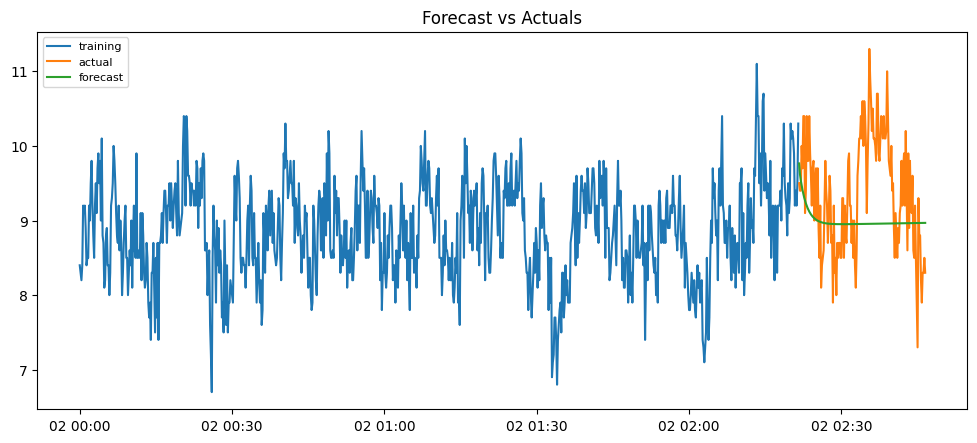

In [187]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='actual')
plt.plot(df_forecast, label='forecast',)
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()